Duomenys imti iš: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [1]:
import mysql.connector as cnt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DB=cnt.connect(
    host='localhost',
    port=3317,
    user='root',
    password='Telefonas15'
)

c=DB.cursor()

NUSTATYTI KLIENTŲ PASITENKINIMĄ ORO LINIJOMIS IR NUO KO JIS PRIKLAUSO.

- Nustatyti bendrą klientų pasitenkinimą oro linijų bendrove.

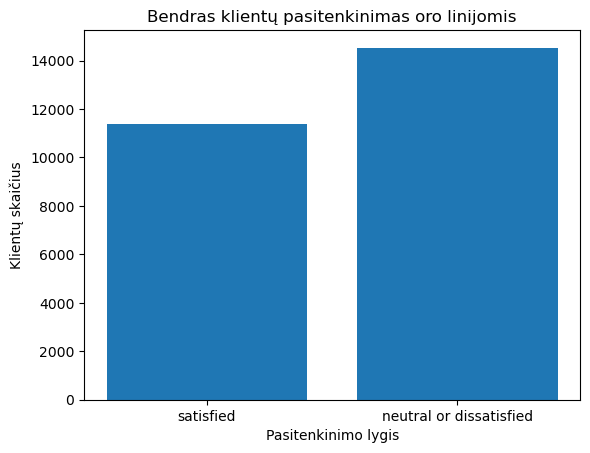

In [10]:
sql = """select satisfaction, count(*) from keliones.keliones
group by satisfaction;"""

c.execute(sql)
ats=c.fetchall()

lygis=[]
count3=[]
for eil in ats:
    lygis.append(eil[0])
    count3.append(eil[1])

fig, ax = plt.subplots()
ax.bar(lygis, count3)

ax.set_title('Bendras klientų pasitenkinimas oro linijomis')
ax.set_xlabel('Pasitenkinimo lygis')
ax.set_ylabel('Klientų skaičius')

plt.show()

- Nustatyti klientų pasitenkinimo priklaudomybę pagal:
    -lytį;
    -lojalumą;
    -kelionės tikslą;
    -skrydžio klasę.

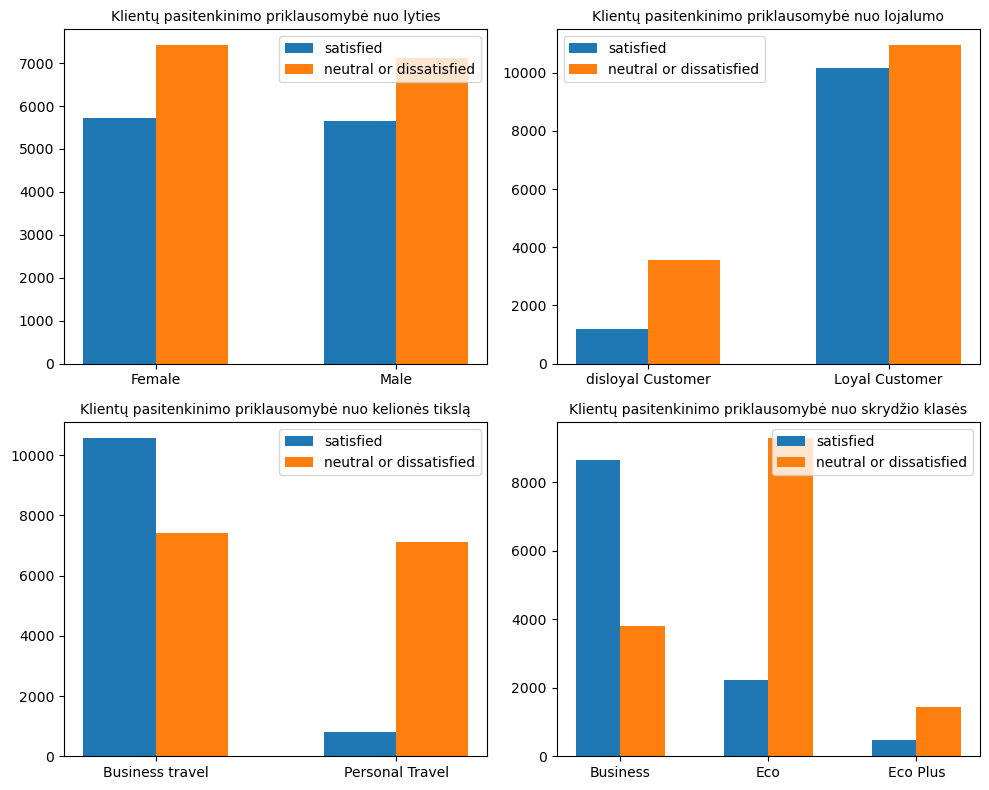

In [4]:
sql = """select gender, count(*) from keliones.keliones
where satisfaction='satisfied'
group by gender
order by `gender` ASC;"""

c.execute(sql)
ats=c.fetchall()

lytis=[]
count=[]
for eil in ats:
    lytis.append(eil[0])
    count.append(eil[1])

sql = """select gender, count(*) from keliones.keliones
where satisfaction='neutral or dissatisfied'
group by gender
order by `gender` ASC;"""

c.execute(sql)
ats=c.fetchall()

count2=[]
for eil in ats:
    count2.append(eil[1])

sql = """select `customer type`, count(*) from keliones.keliones
where satisfaction='satisfied'
group by  `customer type`
order by `customer type` ASC;"""

c.execute(sql)
ats=c.fetchall()

k_tipas=[]
count3=[]
for eil in ats:
    k_tipas.append(eil[0])
    count3.append(eil[1])


sql = """select `customer type`, count(*) from keliones.keliones
where satisfaction='neutral or dissatisfied'
group by  `customer type`
order by `customer type` ASC;"""

c.execute(sql)
ats=c.fetchall()


count4=[]
for eil in ats:
    count4.append(eil[1])


sql="""select `type of travel`, count(*) from keliones.keliones
where satisfaction='satisfied'
group by  `type of travel`
order by `type of travel` ASC;"""

c.execute(sql)
ats=c.fetchall()

kel_tipas=[]
count5=[]
for eil in ats:
    kel_tipas.append(eil[0])
    count5.append(eil[1])

sql="""select `type of travel`, count(*) from keliones.keliones
where satisfaction='neutral or dissatisfied'
group by  `type of travel`
order by `type of travel` ASC;"""

c.execute(sql)
ats=c.fetchall()

count6=[]
for eil in ats:
    count6.append(eil[1])



sql = """select `class`, count(*) from keliones.keliones
where satisfaction='satisfied'
group by  `class`
order by  `class` ASC;"""

c.execute(sql)
ats=c.fetchall()

klase=[]
count7=[]
for eil in ats:
    klase.append(eil[0])
    count7.append(eil[1])


sql = """select `class`, count(*) from keliones.keliones
where satisfaction='neutral or dissatisfied'
group by  `class`
order by  `class` ASC;"""

c.execute(sql)
ats=c.fetchall()

count8=[]
for eil in ats:
    count8.append(eil[1])



fig, ax = plt.subplots(2,2,figsize=(10,8))
x = np.asarray([1,2])
y = np.asarray([1,2])
k = np.asarray([1,2])
l = np.asarray([1,2,3])
w=0.3

ax[0,0].bar(x-w/2,count, width=w, label='satisfied')
ax[0,0].bar(x+w/2,count2,width=w, label='neutral or dissatisfied')
ax[0,1].bar(y-w/2,count3, width=w, label='satisfied')
ax[0,1].bar(y+w/2,count4,width=w, label='neutral or dissatisfied')
ax[1,0].bar(k-w/2,count5, width=w, label='satisfied')
ax[1,0].bar(k+w/2,count6,width=w, label='neutral or dissatisfied')
ax[1,1].bar(l-w/2,count7, width=w, label='satisfied')
ax[1,1].bar(l+w/2,count8,width=w, label='neutral or dissatisfied')

ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(lytis)
ax[0,0].legend()

ax[0,1].set_xticks(y)
ax[0,1].set_xticklabels(k_tipas)
ax[0,1].legend()

ax[1,0].set_xticks(k)
ax[1,0].set_xticklabels(kel_tipas)
ax[1,0].legend()

ax[1,1].set_xticks(l)
ax[1,1].set_xticklabels(klase)
ax[1,1].legend()

ax[0,0].set_title('Klientų pasitenkinimo priklausomybė nuo lyties', fontsize=10)
ax[0,1].set_title('Klientų pasitenkinimo priklausomybė nuo lojalumo', fontsize=10)
ax[1,0].set_title('Klientų pasitenkinimo priklausomybė nuo kelionės tikslą', fontsize=10)
ax[1,1].set_title('Klientų pasitenkinimo priklausomybė nuo skrydžio klasės', fontsize=10)

fig.tight_layout()
plt.show()

-Išvesti bendrą klientų pasitenkinimą skirtingoms oro linijų paslaugoms.

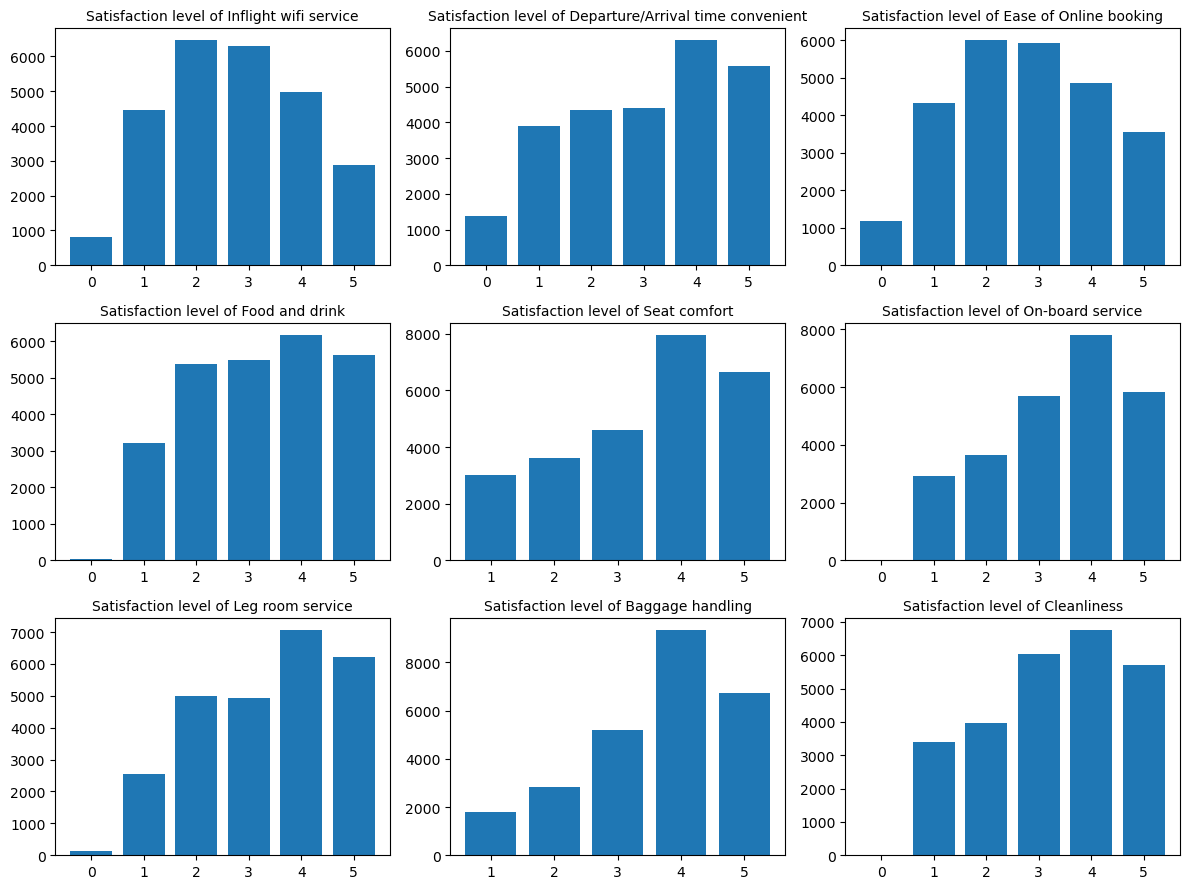

In [5]:
sql="""select `{i}`, count(*) from keliones.keliones group by `{i}` ORDER BY `{i}` ASC;"""
c.execute(sql.format(i='Inflight wifi service'))
ats = c.fetchall()
lygis = []
count = []
for eil in ats:
    lygis.append(eil[0])
    count.append(eil[1])

c.execute(sql.format(i='Departure/Arrival time convenient'))
ats = c.fetchall()
lygis2 = []
count2 = []
for eil in ats:
    lygis2.append(eil[0])
    count2.append(eil[1])


c.execute(sql.format(i='Ease of Online booking'))
ats = c.fetchall()
lygis3 = []
count3 = []
for eil in ats:
    lygis3.append(eil[0])
    count3.append(eil[1])


c.execute(sql.format(i='Food and drink'))
ats = c.fetchall()
lygis4 = []
count4 = []
for eil in ats:
    lygis4.append(eil[0])
    count4.append(eil[1])


c.execute(sql.format(i='Seat comfort'))
ats = c.fetchall()
lygis5 = []
count5 = []
for eil in ats:
    lygis5.append(eil[0])
    count5.append(eil[1])


c.execute(sql.format(i='On-board service'))
ats = c.fetchall()
lygis6 = []
count6 = []
for eil in ats:
    lygis6.append(eil[0])
    count6.append(eil[1])


c.execute(sql.format(i='Leg room service'))
ats = c.fetchall()
lygis7 = []
count7 = []
for eil in ats:
    lygis7.append(eil[0])
    count7.append(eil[1])


c.execute(sql.format(i='Baggage handling'))
ats = c.fetchall()
lygis8 = []
count8 = []
for eil in ats:
    lygis8.append(eil[0])
    count8.append(eil[1])


c.execute(sql.format(i='Cleanliness'))
ats = c.fetchall()
lygis9 = []
count9 = []
for eil in ats:
    lygis9.append(eil[0])
    count9.append(eil[1])

fig, ax = plt.subplots(3,3,figsize=(12,9))

ax[0,0].bar(lygis, count)
ax[0,1].bar(lygis2, count2)
ax[0,2].bar(lygis3, count3)
ax[1,0].bar(lygis4, count4)
ax[1,1].bar(lygis5, count5)
ax[1,2].bar(lygis6, count6)
ax[2,0].bar(lygis7, count7)
ax[2,1].bar(lygis8, count8)
ax[2,2].bar(lygis9, count9)

ax[0,0].set_title('Satisfaction level of Inflight wifi service', fontsize=10)
ax[0,1].set_title('Satisfaction level of Departure/Arrival time convenient',fontsize=10)
ax[0,2].set_title('Satisfaction level of Ease of Online booking',fontsize=10)
ax[1,0].set_title('Satisfaction level of Food and drink', fontsize=10)
ax[1,1].set_title('Satisfaction level of Seat comfort', fontsize=10)
ax[1,2].set_title('Satisfaction level of On-board service', fontsize=10)
ax[2,0].set_title('Satisfaction level of Leg room service', fontsize=10)
ax[2,1].set_title('Satisfaction level of Baggage handling', fontsize=10)
ax[2,2].set_title('Satisfaction level of Cleanliness', fontsize=10)

fig.tight_layout()
plt.show()


-Nustatyti procentinę priklausomybę tarp pasitenkinimo oro linijų bendrove ir skrydžio klasės.

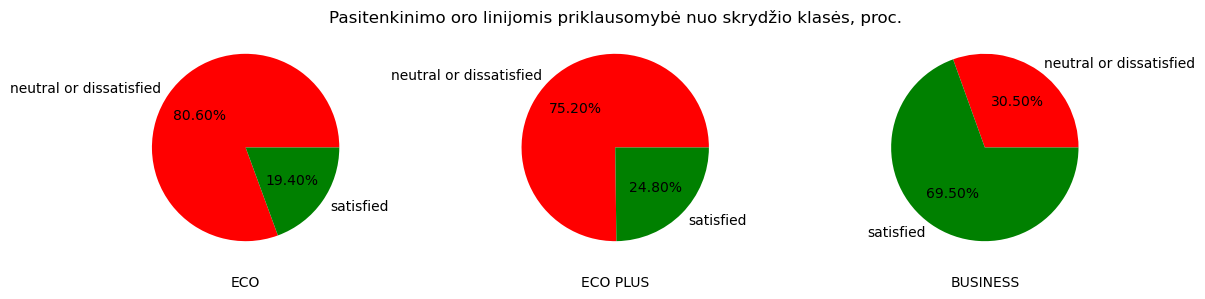

In [6]:
sql="""SELECT satisfaction, round(count(*)/12457*100,1) FROM keliones.keliones
where class='business'
group by class, satisfaction
order by satisfaction ASC;"""

c.execute(sql)
ats=c.fetchall()

pasitenkinimas=[]
proc=[]
for eil in ats:
    pasitenkinimas.append(eil[0])
    proc.append(eil[1])

sql="""SELECT satisfaction, round(count(*)/11524*100,1) FROM keliones.keliones
where class='eco'
group by class, satisfaction
order by satisfaction ASC;"""

c.execute(sql)
ats=c.fetchall()

proc2=[]
for eil in ats:
    proc2.append(eil[1])


sql="""SELECT satisfaction, round(count(*)/1912*100,1) FROM keliones.keliones
where class='eco plus'
group by class, satisfaction
order by satisfaction ASC;"""

c.execute(sql)
ats=c.fetchall()

proc3=[]
for eil in ats:
    proc3.append(eil[1])



fig, (ax,ax2,ax3)=plt.subplots(1,3, figsize=(12,6))
ax.pie(proc2, labels=pasitenkinimas, autopct='%.2f%%', colors=['red', 'green'])
ax2.pie(proc3,labels=pasitenkinimas, autopct='%.2f%%', colors=['red', 'green'])
ax3.pie(proc,labels=pasitenkinimas, autopct='%.2f%%', colors=['red', 'green'])

ax2.set_title('Pasitenkinimo oro linijomis priklausomybė nuo skrydžio klasės, proc.', fontsize=12)
ax.set_xlabel('ECO')
ax2.set_xlabel('ECO PLUS')
ax3.set_xlabel('BUSINESS')

fig.tight_layout()
plt.show()

- Nustatyti procentinę priklausomybę tarp pasitenkinimo oro linijomis ir kelionės tipo.

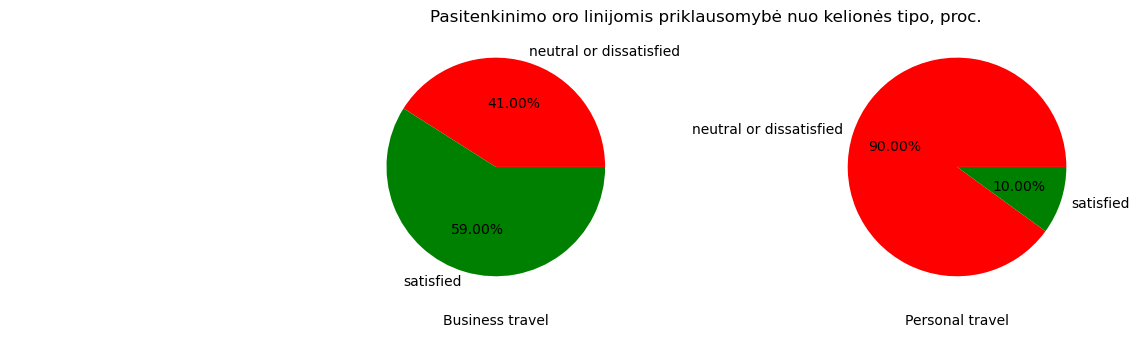

In [7]:
sql="""SELECT satisfaction, round(count(*)/17980*100) FROM keliones.keliones
where `type of travel`='Business travel'
group by `satisfaction`, satisfaction
order by `satisfaction` ASC;"""

c.execute(sql)
ats=c.fetchall()

pasitenkinimas=[]
proc=[]
for eil in ats:
    pasitenkinimas.append(eil[0])
    proc.append(eil[1])

sql="""SELECT satisfaction, round(count(*)/7913*100) FROM keliones.keliones
where `type of travel`='personal travel'
group by `satisfaction`, satisfaction
order by `satisfaction` ASC;"""

c.execute(sql)
ats=c.fetchall()

pasitenkinimas2=[]
proc2=[]
for eil in ats:
    pasitenkinimas2.append(eil[0])
    proc2.append(eil[1])




fig, ax=plt.subplots(1,2, figsize=(8,6))
ax[0].pie(proc, labels=pasitenkinimas, autopct='%.2f%%', colors=['red', 'green'])
ax[1].pie(proc2, labels=pasitenkinimas2, autopct='%.2f%%', colors=['red', 'green'])

ax[0].set_title('                                                                                Pasitenkinimo oro linijomis priklausomybė nuo kelionės tipo, proc.', fontsize=12)
ax[0].set_xlabel('Business travel')
ax[1].set_xlabel('Personal travel')

fig.tight_layout()
plt.show()

In [8]:
travel=pd.read_csv('keliones.csv')
travel.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


- Išanalizuoti skrydžių atstumus: rasti vidurkį, medianą.

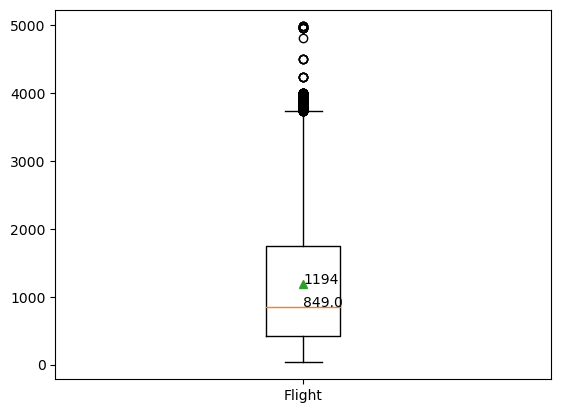

In [9]:
distance=travel['Flight Distance'].values
m = np.median(distance)
av = round(np.mean(distance))
fig, ax = plt.subplots()
ax.boxplot(distance,showmeans=True)
ax.set_xticklabels(['Flight'])
ax.text(1,m, str(m)) 
ax.text(1,av, str(av)) 
plt.show()